In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('IRIS.csv')

In [ ]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# checking for NA values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

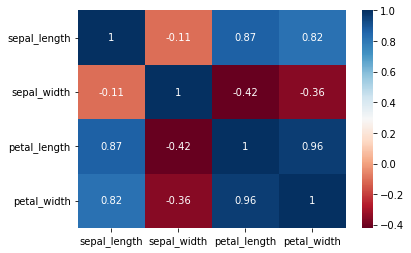

In [ ]:
# Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='RdBu')

In [ ]:
# Dropping sepal width with less co
df.drop(['sepal_width'], axis=1)

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,Iris-setosa
1,4.9,1.4,0.2,Iris-setosa
2,4.7,1.3,0.2,Iris-setosa
3,4.6,1.5,0.2,Iris-setosa
4,5.0,1.4,0.2,Iris-setosa
...,...,...,...,...
145,6.7,5.2,2.3,Iris-virginica
146,6.3,5.0,1.9,Iris-virginica
147,6.5,5.2,2.0,Iris-virginica
148,6.2,5.4,2.3,Iris-virginica


In [ ]:
#label encoder on species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [ ]:
# Training Testing
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['species'])
Y = df['species']


In [ ]:
# Apply standard scaler
# from sklearn.preprocessing import StandardScaler
# scalar= StandardScaler()
# scalar.fit(X)
# sc_data=scalar.transform(X)
# sc_data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state=0)

In [ ]:
# Logistic Reg
from sklearn.linear_model import LogisticRegression
# normal log reg
# model = LogisticRegression()
# ultinomial log regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [ ]:
Y_pred_train
Y_pred_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
from sklearn import metrics
# training accuracy
metrics.accuracy_score(Y_train, Y_pred_train)

0.9809523809523809

In [ ]:
# testing accuracy
metrics.accuracy_score(Y_test, Y_pred_test)

0.9777777777777777